<a href="https://colab.research.google.com/github/DebershiMitra/Probability-and-Statistics/blob/main/Lecture_notes_06_ProbabilityDistributions_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue'>**Content**</font>

- Empirical vs Theoretical Probability
- Expectations
- Binomial Distribution
- Bernoulli Distribution



## <font color='blue'>**Case study on Empirical vs Theoretical Probability</font>**

### <font color='purple'>**Casino Case Study**</font>

**Problem Statement:**

<br>

- A bag has **<font color='red'>3 Red</font>** and **<font color='blue'>2 Blue</font>** balls.

  We pick a ball, write its colour, and **<font color='orange'>put it back</font>** in the bag. This is done **<font color='brown'>4 times</font>** in total.

  If all 4 times, the **<font color='red'>Red balls</font>** was drawn, we **<font color='green'>win Rs 150</font>**.

  Otherwise we **<font color='violet'>lose Rs 10</font>**.

> <font color='purple'>**Question : Would engaging in this game result in a profit or loss for us?**</font>



Whether we end up gaining or losing will depend on how many red balls are drawn.   


### <font color='blue'>How many number of red balls can we expect to be drawn?</font>

Let's define a random variable $X$ to denote the number of red balls drawn

> <font color='purple'>**1. What are the possible outcomes of $X$?**</font>


X can be equal to $0, 1, 2, 3$ or $4$

Note that $X$ is a discrete random variable.


### <font color='purple'>**Empirical Approach**</font>

Let's try to estimate whether we will have a profit or loss after playing this game, using probabilities.

For this, we will simulate this situation in Python code.

In [ ]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

There is an important function that we need to know about

#### <font color='purple'>**np.random.choice()**</font>

Suppose we provide a list of possible outcomes to this function, for a simple event, say, a coin toss

It has 2 possible outcomes:
- Head
- Tails

This function will randomly choose one of these possible outcomes, with an equal probability and return it.

In [ ]:
np.random.choice(['H', 'T'])

'T'

> <font color='purple'>**2. What do you think is the probability of getting Heads or getting a Tails?**</font>

It should be 0.5

<br>

Now imagine, we modify the input list of possible outcomes to `[H, T, T]`

In [ ]:
np.random.choice(["H","T","T"])

'T'

> <font color='purple'>**3. What will be the probability of getting heads or getting tails now?**</font>

Now, P(Heads) should be: $\frac{1}{3}$

And, P(Tails) should be: $\frac{2}{3}$

> <font color='purple'>**4. What if we want to toss this coin twice?**</font>

We have a paramter `size` that we can use define the size of the random outcomes from the passed list.

In [ ]:
np.random.choice(["H","T","T"],size=2)

array(['T', 'H'], dtype='<U1')

So here,
- It has chosen this first `H` randomly from `[H, T, T]`
- And then it has again randomly chosen the second `T` from `[H, T, T]`

Now that we've understood `np.random.choice()`

> <font color='purple'>**How can we simulate the given Casino problem?**</font>

Since we have,
- 3 red balls and
- 2 blue balls

We can represent the possible outcomes as a list `["R", "R", "R", "B", "B"]`

In [ ]:
np.random.choice(["R","R","R","B","B"])

'B'

Since the ball is being drawn 4 times, we set `size = 4`

Now since we'd like to have a count of number of red balls, l<font color='purple'>et's store the random result in a variable `rolls`</font>

In [ ]:
#Code to be shared to learners
rolls=np.random.choice(["R","R","R","B","B"],size=4)
rolls

array(['R', 'B', 'B', 'R'], dtype='<U1')


We know that it is possible to get 7 heads on 10 coin tosses, when using a fair coin.

So how would one go about proving that P(Heads) = 0.5 for a fair coin?



<font color='purple'>This process of simulating the experiment, and repeating it multiple times, is done in an effort to calculate probability value (of getting heads in this example)</font>.

This value is known as **Empirical Probability**.
- The idea is make estimates **using real-world data/observations**



#### <font color='purple'>np.count_nonzero()</font>

There is another function in numpy **`np.count_nonzero()`**

It will return the no of non-zero elements in the list we provide to it.



In [ ]:
np.count_nonzero([2, 1, 0, 0, 0, 3, 4, 5])

5

This function can be used in another way, for our purposes.  

Here in this case study, we need to count the number of red ball drawns so we will create a boolean mask of red ball

> <font color='purple'>**1. What will `rolls == "R"` return?**</font>



In [ ]:
rolls == "R"

array([ True, False, False,  True])

<font color='purple'>This means that anything other than `"R"` will become `False`</font>.

This function will treat `False` as `0`, if the passed list contains booleans.

So we can use this mask, to count the number of red balls in our list `rolls`

In [ ]:
#Code to be shared to learners
np.count_nonzero(rolls=="R")

2


- We already know how to simulate a ball draw
- Let's store the no of reds observed in a variable `num_red`
- And store this value for all 10,000 simulations into a list `red_values`

In [ ]:
red_values=[]

for person in range(10000):
    rolls=np.random.choice(["R","R","R","B","B"],size=4)
    num_red=np.count_nonzero(rolls=="R")
    red_values.append(num_red)
pd.value_counts(red_values)

3    3552
2    3394
1    1496
4    1281
0     277
dtype: int64

In [ ]:
# red_values

Let's do a `.value_counts()` to see the frequency of values values it contains.

In [ ]:
pd.value_counts(red_values,normalize=True)

3    0.3552
2    0.3394
1    0.1496
4    0.1281
0    0.0277
dtype: float64

We are aware that passing `normalize=True` in `value_counts()` gives us the result in percentage of their occurence.

We can see that the probability of drawing 3 red balls is 0.3552, 2 red balls is 0.3394 and so on..

> <font color='purple'>**Based on this data, how many red balls we will get on an average based on simulations we have done 10,000 times?**</font>

In [ ]:
# This is empirical value
np.mean(red_values)

2.4064


To obtain theoretical value, we should perform the simulations numerous times.   

- With an increasing number of trials, the result approaches the theoretical value, though an exact match may not be achieved.


To prove this claim let's look into one simple example of coin toss.

**Experiment : Coin Toss**

We know, theoretically the probability of getting head and tails in a coin toss is 0.5

Let's try to prove it:



In [ ]:
pd.value_counts(np.random.choice(["H", "T"], size=10), normalize=True)

T    0.8
H    0.2
dtype: float64

We can see that if we perform the simulations for limited trials, result is not matching theoretical value.  

Let's run the simulation for numerous times

In [ ]:
pd.value_counts(np.random.choice(["H", "T"], size=1000000), normalize=True)

H    0.500142
T    0.499858
dtype: float64


As predicted, we are getting values much closer to the theoretical result of 0.5

### <font color='purple'>**Expectation using Empirical Approach**</font>

We got the following value counts

In [ ]:
pd.value_counts(red_values)

3    3552
2    3394
1    1496
4    1281
0     277
dtype: int64

And these values yielded us a mean of `2.4064`

In [ ]:
np.mean(red_values)

2.4064

> <font color='purple'>**How do we think, this mean was calculated from these frequency values?**</font>

As we learnt in the last class, this was calculated as a result of **Weighted Average**

So, for the given frequency count, we can see that this is calculated as: $ Mean = \frac{4(1281) + 3(3552) + 2(3394) + 1(1496) + 0(277)}{1281 + 3552 + 3394 + 1496 + 277} = \frac{4(1281) + 3(3552) + 2(3394) + 1(1496) + 0(277)}{10000}$


In [ ]:
(4*(1281) + 3*(3552) + 2*(3394) + 1*(1496) + 0*(277)) / (10000)

2.4064

Now that we've verified this,

Let's represent the same equation in a slightly different format.

$Mean = 4 \frac{1281}{10000} + 3 \frac{3552}{10000} + 2 \frac{3394}{10000} + 1 \frac{1496}{10000} + 0 \frac{277}{10000}$

<br>

If we closely look at the value counts table, we will see that this can be represented as the following formula:

<font color='purple'>$E(X) = Σ_i X_i*P(X = X_i)$</font>

where
- $X$ was our random variable that denotes the no of red balls drawn.
- $P(X = X_i)$ represents the probability of X getting a value of $X_i$
- $E(X)$ is known as the **Expected value** of the random variable $X$

<br>

Let's define it formally:

`Expectation of a random variable X, is the weighted average of the values that X takes, with the weights being the probabilities.`




Until now, we simulated the event 10,000 times, and found an expected value of random variable X using the data observed.

This is known as the **Empirical Approach** of solving the problem.
<br>



### <font color='purple'>**Theoretical Approach**</font>

Now, let's solve this case study using theoretical approach and observe the difference in the result

Let's look at the problem statement once more.

**Problem Statement**:  

<br>

A bag has **<font color='red'>3 Red</font>** and **<font color='blue'>2 Blue</font>** balls.

we pick a ball, write its colour, and **<font color='orange'>put it back</font>** in the bag. This is done **<font color='brown'>4 Times</font>** in total.

If all 4 times, the **<font color='red'>Red balls</font>** was drawn, we **<font color='green'>win Rs 150</font>**.

Otherwise we **<font color='violet'>lose Rs 10</font>**.

> <font color='purple'>**Question: Would engaging in this game result in a profit or loss for us?**</font>


Let's define 2 events:
- $R$: Drawing a red ball
- $B$: Drawing a blue ball

> <font color='purple'>**1. What would be the probability of obtaining a red ball once?**</font>

$P(R) = \frac{3}{5}$

Similarly, we know that $P(B) = \frac{2}{5}$

> <font color='purple'>**2. What is the probability of drawing a red ball twice?**</font>

$P(RR) = \frac{3}{5} * \frac{3}{5}$

<br>

> <font color='purple'>**3. What is the probability of drawing a red ball followed by a blue ball?**</font>

$P(RB) = \frac{3}{5} * \frac{2}{5}$

<br>

These values are easy to evaluate when we are drawing the balls just twice.



In our case study, we are **drawing it 4 times**. Let's consider that case.

Like before, we define $X$ as a random variable that denotes the no of red balls drawn.


> <font color='purple'>**4. What would be the probability of obtaining 1 red ball?**</font>

For $X=1$, we can have 4 possible cases as drawn below:
- BBBR
- BBRB
- BRBB
- RBBB

Let's look at the probability value of each of these individual cases:
- Case 1: $\frac{2}{5} * \frac{2}{5} * \frac{2}{5} * \frac{3}{5}$
- Case 2: $\frac{2}{5} * \frac{2}{5} * \frac{3}{5}* \frac{2}{5}$  

and so on

So we can see that for all these 4 cases, we can write their <font color='purple'>probability as: $(\frac{2}{5})^3 * (\frac{3}{5})^1$</font>

<br>

Since there are 4 such cases, we write the total probability of $X = 1$ as:

<font color='purple'>$P(X = 1)$ = case 1 OR case 2 OR case 3 OR case 4</font>

<font color='purple'>$P(X = 1) = 4*(\frac{2}{5})^3 * (\frac{3}{5})^1$</font>

> <font color='purple'>**5. What would be the probability of getting 2 red balls out of the 4 balls drawn?**</font>

Let's look at the different orientations possible for $X = 2$.
- We have 6 possibilities.

Let's look at the probability of each of these orientations:
- <font color='purple'>Case 1: $\frac{2}{5}*\frac{2}{5}*\frac{3}{5}*\frac{3}{5}$</font>

... and so on

So, at the end of the day, we know that probability for each of these individual cases would be: <font color='purple'>$(\frac{2}{5})^2 * (\frac{3}{5})^2$</font>

Since either of these 6 cases are possible, the total probability becomes:

<font color='purple'>**$P(X=2) = 6*(\frac{2}{5})^2 * (\frac{3}{5})^2$**</font>


#### <font color='purple'>**Conclusion**</font>

> <font color='purple'>**1. Can we write this 4 and 6 in a different format?**</font>

Recall the combinatorics lecture.

We know that
- $4 = \ ^4C_1$
- $6 = \ ^4C_2$

<br>

> <font color='purple'>**2. With this in mind, when we take a look at the results of $P(X=1)$ and $P(X=2)$, can we derive some general expression?**</font>

So, $P(X = k) = \ ^4C_k \ (\frac{3}{5})^k \ (\frac{2}{5})^{4-k}$

Notice that here, `4` is nothing but the no of times a ball was drawn from the bag, i.e. **no of trials**

<br>

We can use this derived equation to find probability for all valid values of the random variable $X$:
- $P(X = 0) = \ ^4C_0 \ (\frac{3}{5})^0 \ (\frac{2}{5})^{4}$
- $P(X = 1) = \ ^4C_1 \ (\frac{3}{5})^1 \ (\frac{2}{5})^{3}$
- $P(X = 2) = \ ^4C_2 \ (\frac{3}{5})^2 \ (\frac{2}{5})^{2}$
- $P(X = 3) = \ ^4C_3 \ (\frac{3}{5})^3 \ (\frac{2}{5})^{1}$
- $P(X = 4) = \ ^4C_4 \ (\frac{3}{5})^4 \ (\frac{2}{5})^{0}$

Now we've understood this in theory, but

> <font color='purple'>**1. How can we compute this in code?**</font>

We will use built-in functions of the `math.comb()` library.

In [ ]:
import math



> <font color='purple'>**2. How will we find the value of $^4C_0$?**</font>

In [ ]:
math.comb(4, 0)

1

As we can see this gave us the result of $\frac{4!}{0! * (4-0)!}$

Similarly, we can find $^4C_1$ as:

In [ ]:
math.comb(4, 1)

4

Let's evaluate the probability values $P(X)$ for all possible values of $X = \left \{0, 1, 2, 3, 4 \right \}$

In [ ]:
# P(X=0)
math.comb(4,0)* (3/5)**0 * (2/5)**4

0.025600000000000005

In [ ]:
# P(X=1)
math.comb(4,1)* (3/5)**1 * (2/5)**3

0.15360000000000004

In [ ]:
# P(X=2)
math.comb(4,2)* (3/5)**2 * (2/5)**2

0.3456000000000001

In [ ]:
# P(X=3)
math.comb(4,3)* (3/5)**3 * (2/5)**1

0.34559999999999996

In [ ]:
# P(X=4)
math.comb(4,4)* (3/5)**4 * (2/5)**0

0.1296

Let's compare these probability results to what we evaluated through the Empirical approach

Notice that these values are very close.

As discussed earlier, **if we increase the no of simulations, the observed result would be more and more closer to these theoretical values**.

Hence, proved.

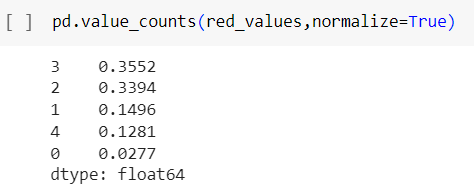

## <font color='purple'>**Binomial Distribution**</font>


Binomial distribution is a <font color='purple'>**discrete probability distribution**</font> of the number of successes in `n` **independent** experiments sequence.

A Binomial trial will always have <font color='purple'>**two possible outcomes**</font>:
- Success / Win
- Failure / Loss

<br>

We defined a **discrete random variable** $X$ that denoted number of red balls drawn.
- Note that the event of drawing a ball is independent.
- $X$ will be called a **Binomial RV**

Also, we were given some parameters in our problem, let's define them:
- $n$: No of independent trials
 - In our example, we draw balls 4 times, hence $n=4$
- $p$: Probability of success in one trial
 - In our example, this denotes the probability of drawing a red ball, hence <font color='purple'>$p = \frac{3}{5}$</font>
 - Therefore, <font color='purple'>$(1-p)$</font> becomes the probability of failure in each trial (i.e. drawing a blue ball, in this example)

<br>


Using these parameters, we can re-write the equation we derived in general form: <font color='purple'>$P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$</font>

Let's plot our calculated values to see what Binomial distribution looks like.

In [ ]:
x = pd.value_counts(red_values, normalize=True)
x

3    0.3552
2    0.3394
1    0.1496
4    0.1281
0    0.0277
dtype: float64

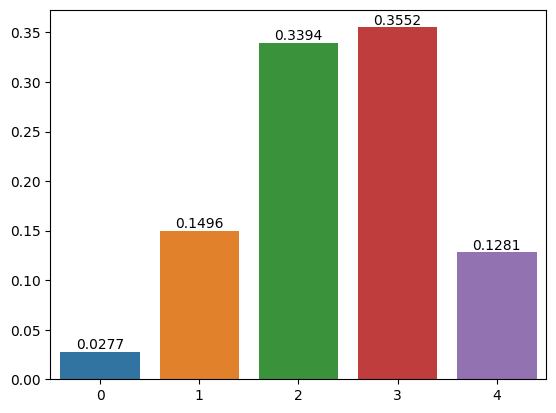

In [ ]:
ax = sns.barplot(x = x.index, y = x.values)

for i in ax.containers:
  ax.bar_label(i,)

<br>
<br>

This is the **Probabillity Mass Function (PMF)** of our given Binomial experiment, which is called as Binomial Probability Distribution
- The graph shows the probability of obtaining each possible number of successes (k) in n trials.
- The height of each bar represents the probability of that particular outcome.
- The sum of all the probabilities equals 1.

<br>

The `scipy.stats.binom` library gives us a built in function that eases the calculation of PMF values (i.e. value of $P(X)$ for specific values of $X$).

Instead of using the formula $P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$, we can directly use this function to calculate the PMF value.

We just need to specify the 3 parameters:
- n
- k
- p

In [ ]:
from scipy.stats import binom

In [ ]:
prob_0_red = binom.pmf(n=4,p=3/5,k=0)
prob_0_red

0.025599999999999994

In [ ]:
prob_1_red = binom.pmf(n=4,p=3/5,k=1)
prob_1_red

0.15359999999999996

In [ ]:
prob_2_red = binom.pmf(n=4,p=3/5,k=2)
prob_2_red

0.3456

In [ ]:
prob_3_red = binom.pmf(n=4,p=3/5,k=3)
prob_3_red

0.3456000000000001

In [ ]:
prob_4_red = binom.pmf(n=4,p=3/5,k=4)
prob_4_red

0.1296

Notice that these values are the same as what we calculated using `math.comb`

### <font color='purple'>**Expectation using theoretical approach**</font>

> <font color='purple'>**How will we calculate the theoretical expectation value?**</font>

We know the formula: <font color='purple'>$E(X) = Σ_i X_i P(X = X_i)$</font>
- Here, we saw that we can calculate the probability values using `scipy.stats.binom`
- And that random variable $X = \left \{0, 1, 2, 3, 4 \right \}$

In [ ]:
expectation_theoretical= (0*prob_0_red) + (1*prob_1_red) + (2*prob_2_red) + (3*prob_3_red) + (4*prob_4_red)
expectation_theoretical

2.4000000000000004

Note that this is close to the <font color='purple'>**Empirical Expected value**</font> we calculated.

Alternately, there is a built-in function to find this expected value in `stats.binom`

Here, we need to pass the following arguments to `args`:
- n, and
- p

In [ ]:
binom.expect(args=(4,3/5))

2.4000000000000004

Let's define another random variable $Y$ that denotes the amount of money won/lost through gambling.
- Therefore, possible values of $Y: \left \{150, -10 \right \}$

Let's create a table for this random variable $Y$, with it's posibble values and corresponding probabilities.
- Case of winning Rs 150 ($Y = 150$)
 - <font color='purple'>$P(Y = 150)$ would be the same as $P(X = 4)$</font>
- Case of loosing Rs 10 ($Y = -10$)
 - <font color='purple'>$P(Y = -10) = P(X=0) + P(X=1) + P(X=2) + P(X=3) = 1 - P(X=4)$</font>

In [ ]:
# P(Y=150)
prob_4_red

0.1296

In [ ]:
#P(Y = -10)
1 - prob_4_red

0.8704000000000001

> <font color='purple'>**What would be expected value of $Y$?**</font>

$E(Y) = Σ_i Y_i P(Y = Y_i) = (150*0.1296) + (-10*0.8704000000000001)$

In [ ]:
expected_y = (150*0.1296) + (-10*0.8704000000000001)
expected_y

10.735999999999997

#### <font color='orange'>**Conclusion of the case study**:</font>

This value means that if we play many many times, at the end of the day, **we are expected to have profit of Rs 10.736**

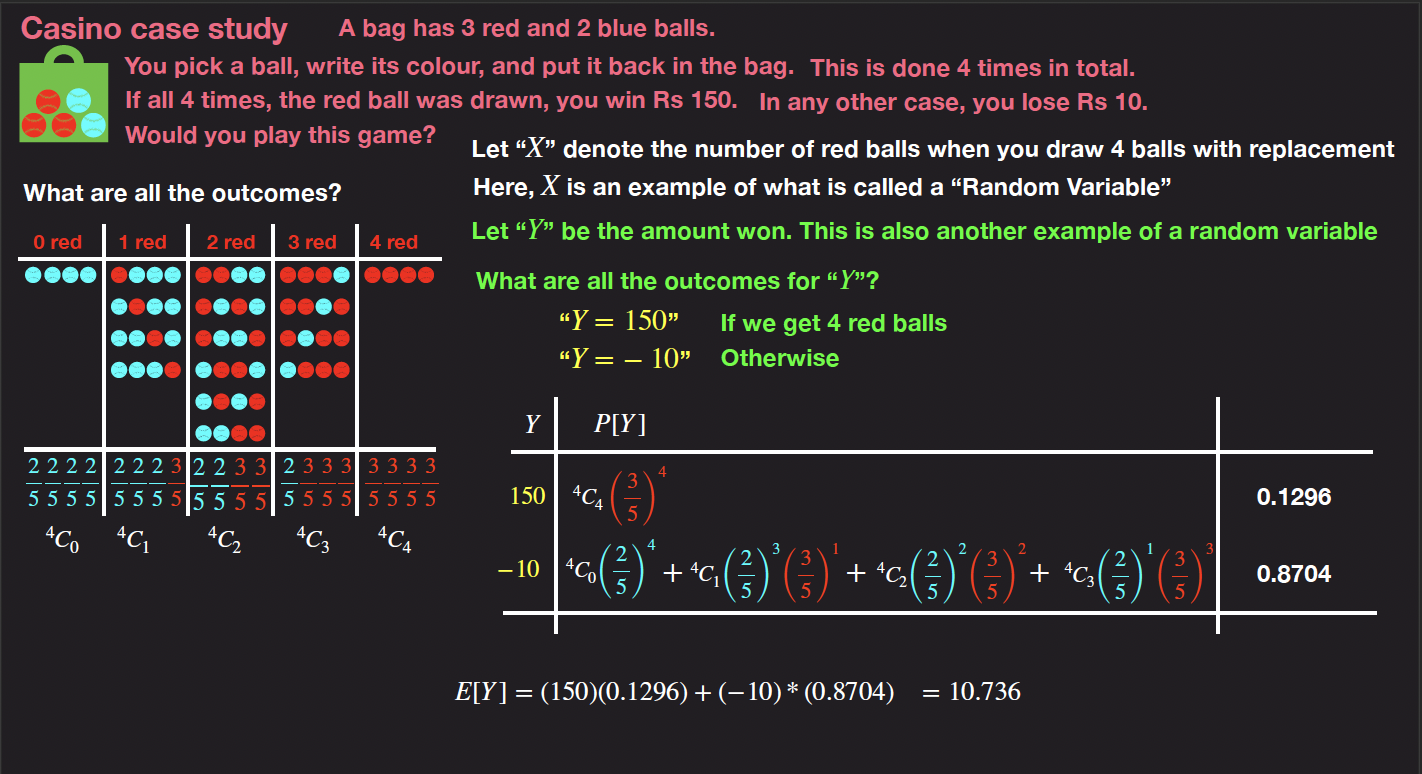

<br>
<br>

### <font color='purple'>Conditions of Binomial Experiment</font>

1. The experiment must consist of a **fixed number of trials (n)**, with only 2 possible outcomes: Success or Failure


2. Individual trials are **identical and independent**.


3. The random variable denotes the number of success in `n` trials.


## <font color='purple'>**Bernoulli Trials**</font>

Essentially, it is the **special case** of Binomial trial, where `n = 1`

Hence, it must also follow the condition that there must be only 2 possible outcomes:
- Success, or
- Failure

<br>

Let's plot this, to see what **Bernoulli distribution** looks like.

Text(0, 0.5, 'P(X)')

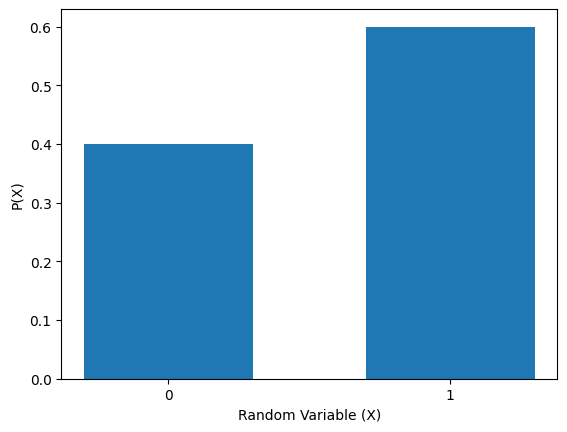

In [ ]:
x = [0, 1]
y = [2/5, 3/5]

plt.bar(x, y, width=0.6, tick_label=["0", "1"])
plt.xlabel("Random Variable (X)")
plt.ylabel("P(X)")

<br>
<br>


> <font color='purple'>**To summarize, what is the difference between Binomial and Bernoulli distribution?**</font>

- Bernoulli deals with the outcome of the single trial of the event, whereas Binomial deals with the outcome of the multiple trials of the single event.

- Hence, we can define **Binomial distribution** in another way:

 `It is the collection of Bernoulli trials for the same event, i.e., it contains more than 1 Bernoulli event for the same scenario for which the Bernoulli trial is calculated.`



## <font color='purple'>Dice Example</font>

```
You toss 2 dice. If both dice are 6, you get Rs 2. Else, if one dice is 6, you get Rs 1.
Otherwise, you do not get anything.
```

Let's define a random variable $X$ that represents the amount of money won.
- Hence, it can take the values: $X = \left \{0, 1, 2 \right\}$

<br>

Answer the following questions.

> <font color='purple'>**What is the probability of getting the following?**</font>
- Rs 0
- Rs 1
- Rs 2



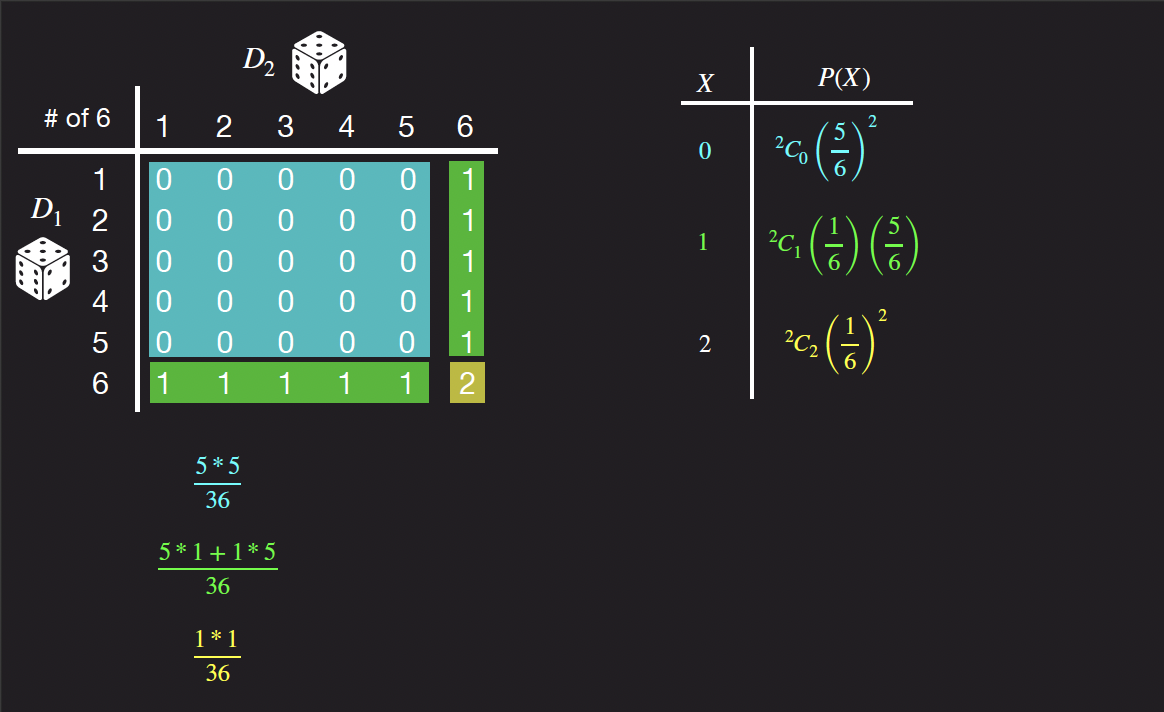

<br>

<br>

> **Finding $P(X=0)$**

From the table we can see that we will get 0 Rs for 25 outcomes, hence $P(X=0) = \frac{25}{36}$

<br>

> **Finding $P(X=1)$**

From the table, $P(X=1) = \frac{10}{36}$

<br>

> **Finding $P(X=2)$**

From the table, $P(X=2) = \frac{1}{36}$

lets see if we can obtain the same answers using the Binomial formula

Before we get to solving, let's define the parameters:
- **What will be the value of `n`?**
 - Since we are throwing 2 dice, $n=2$
- **What will be the value of `p`?**
 - `p` is defined as the probability of succes in one trial
 - So how do we define success here?
 - Obtaining a 6
 - Therefore, p = probability of getting a 6 in a single dice roll, i.e. $p=\frac{1}{6}$

We know the Binomial formula is: $P(X = k) = \ ^nC_k \ (p)^k \ (1-p)^{n-k}$

Therefore,
- $P(X = 0) = \ ^2C_0 \ (\frac{1}{6})^0 \ (\frac{5}{6})^{2} = 1 * 1 * \frac{25}{36} = \frac{25}{36}$
- $P(X = 1) = \ ^2C_1 \ (\frac{1}{6})^1 \ (\frac{5}{6})^{1} = 2 * \frac{1}{6} * \frac{5}{6} = \frac{10}{36}$
- $P(X = 2) = \ ^2C_2 \ (\frac{1}{6})^2 \ (\frac{5}{6})^{0} = 1 * \frac{1}{36} * 1 = \frac{1}{36}$

<br>

These are the exact answers we got using the table above!!

Alternately, we could've evaluated the binomial formula using code as:

In [ ]:
binom.pmf(n=2,p=1/6,k=0)

0.6944444444444443

Now answer the second question.

> **What is the expected value of money won?**

We can find this using the formula: $E(X) = Σ_i X_i P(X = X_i)$

$= (0*\frac{25}{36}) + (1*\frac{10}{36}) + (2*\frac{1}{36})$

$=\frac{1}{3}$

<br>

Alternately, we can use the `stats.binom.expect()` function

<br>

In [ ]:
binom.expect(args=(2,1/6))

0.33333333333333326

---